<a href="https://colab.research.google.com/github/shtrausslearning/sf_mldl/blob/main/lecture_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# White elephant

1. [Plotting](#Plotting)
    1. [matplotlib](#matplotlib)
    2. [seaborn](#seaborn)
2. [Data visualization](#Data-visualization)
3. [Big Data](#Big-Data)
    1. [Origins](#Origins)
    2. [Hadoop](#Hadoop)
    3. [YARN](#YARN)
    4. [ZooKeeper](#ZooKeeper)
    5. [Spark](#Spark)
    6. [Kafka](#Kafka)

## Plotting

* matplotlib
    * The 800-pound gorilla — and like most 800-pound gorillas, this one should probably be avoided unless you genuinely need its power, e.g., to make a custom plot or produce a publication-ready graphic.
* Seaborn
 * “If matplotlib ‘tries to make easy things easy and hard things possible,’ seaborn tries to make a well-defined set of hard things easy too”
* yhat’s ggplot
    * A Python implementation of the wonderfully declarative ggplot2. This isn’t a “feature-for-feature port of ggplot2,” but there’s strong feature overlap. 

#### matplotlib

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('classic')

%matplotlib inline

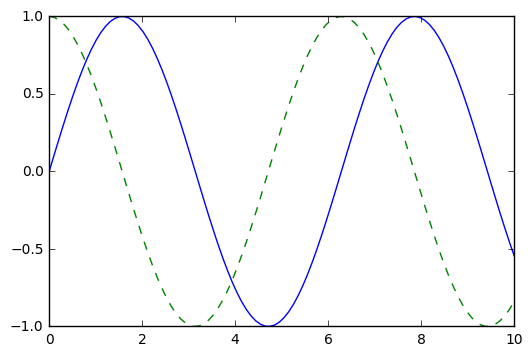

In [ ]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [ ]:
fig.savefig('trig.png')

In [ ]:
!ls -lh trig.png

-rw-r--r--@ 1 s.stupnikov  staff    26K 16 сен 18:00 trig.png


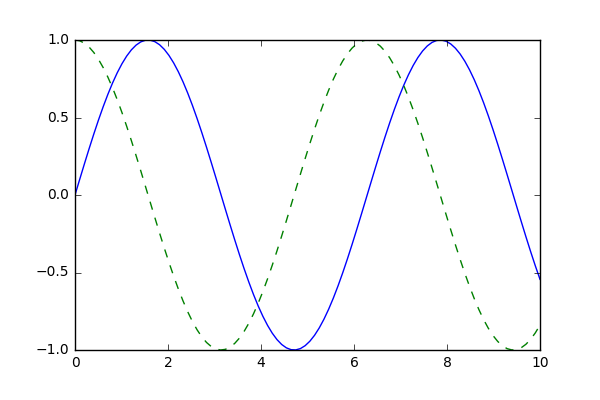

In [ ]:
from IPython.display import Image
Image('trig.png')

In [ ]:
# different backends
fig.canvas.get_supported_filetypes()

{u'eps': u'Encapsulated Postscript',
 u'jpeg': u'Joint Photographic Experts Group',
 u'jpg': u'Joint Photographic Experts Group',
 u'pdf': u'Portable Document Format',
 u'pgf': u'PGF code for LaTeX',
 u'png': u'Portable Network Graphics',
 u'ps': u'Postscript',
 u'raw': u'Raw RGBA bitmap',
 u'rgba': u'Raw RGBA bitmap',
 u'svg': u'Scalable Vector Graphics',
 u'svgz': u'Scalable Vector Graphics',
 u'tif': u'Tagged Image File Format',
 u'tiff': u'Tagged Image File Format'}

__Interfaces__

MATLAB

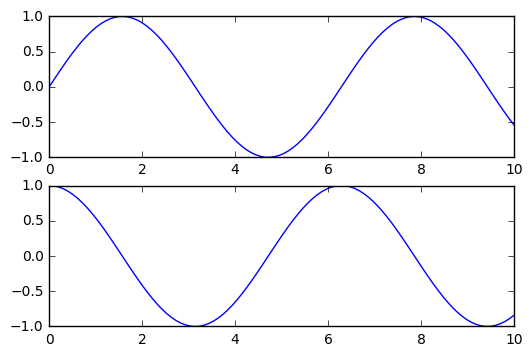

In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Object oriented

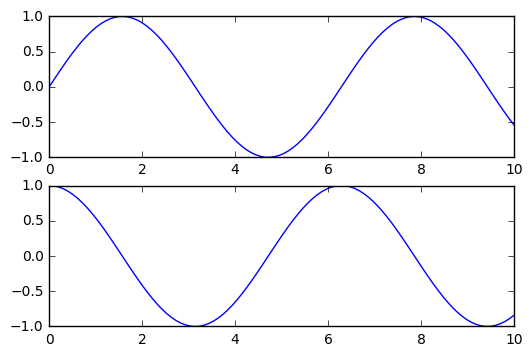

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated. In most cases, the difference is as small as switching plt.plot() to ax.plot()

__Line plots__

In [ ]:
plt.style.use('seaborn-whitegrid')

In Matplotlib, the *figure* (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.

The *axes* (an instance of the class plt.Axes) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization

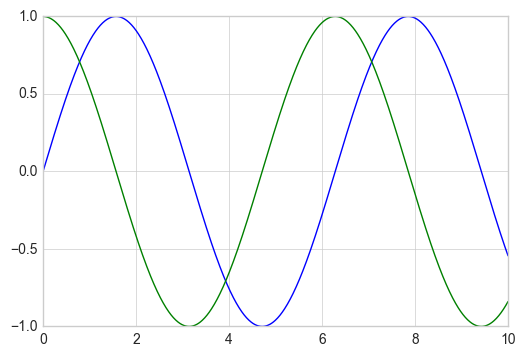

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

__Plot options__

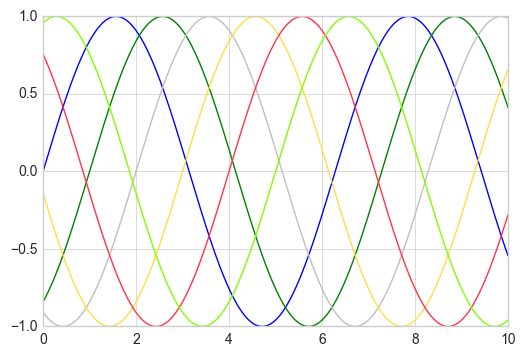

In [ ]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

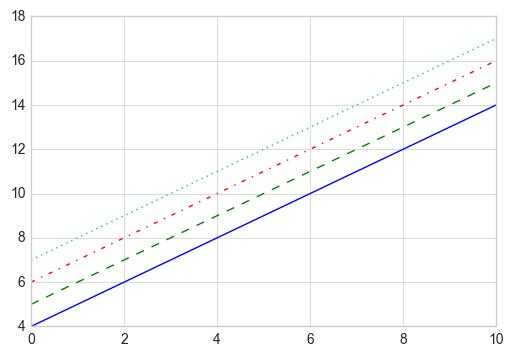

In [ ]:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

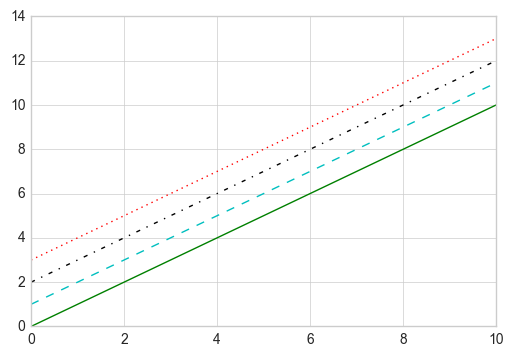

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

In [ ]:
plt.plot?

__Limits__

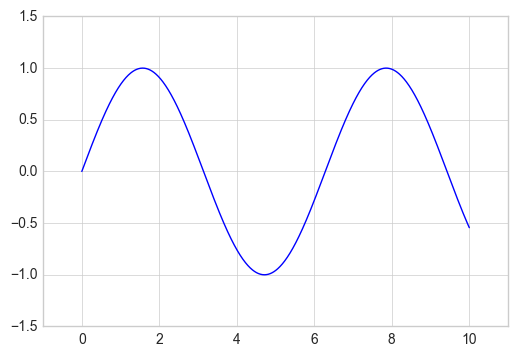

In [ ]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);
# or plt.axis([-1, 11, -1.5, 1.5]);

(0.0, 10.0, -0.99999729548113214, 0.99999969949778322)

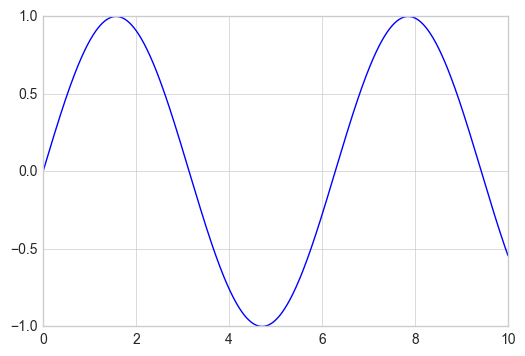

In [ ]:
plt.plot(x, np.sin(x))
plt.axis('tight');

__Labels__

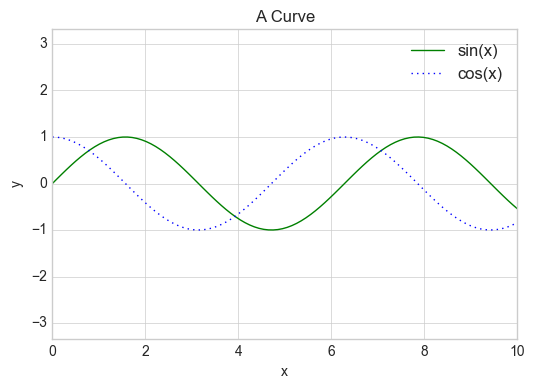

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.title("A Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

While most `plt` functions translate directly to ax methods (such as `plt.plot()` → `ax.plot()`, `plt.legend()` → `ax.legend()`, etc.), this is not the case for all commands

* plt.xlabel() → ax.set_xlabel()
* plt.ylabel() → ax.set_ylabel()
* plt.xlim() → ax.set_xlim()
* plt.ylim() → ax.set_ylim()
* plt.title() → ax.set_title()

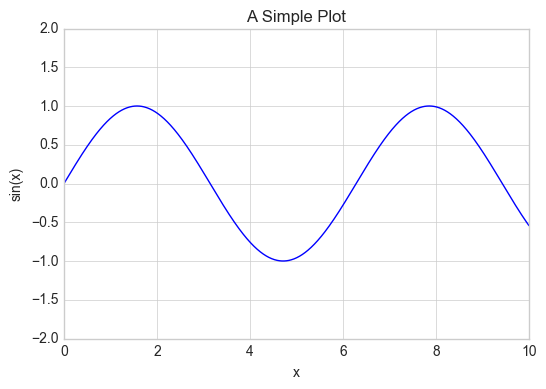

In [ ]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

__Scatter plots__

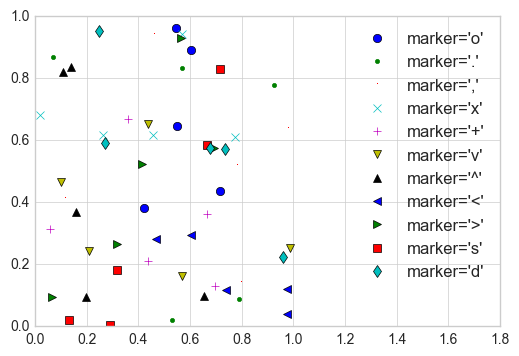

In [ ]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='%s'" % marker)
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

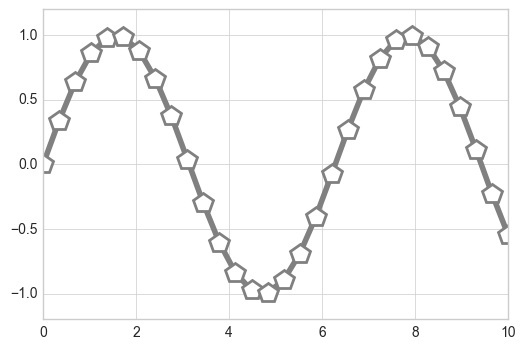

In [ ]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

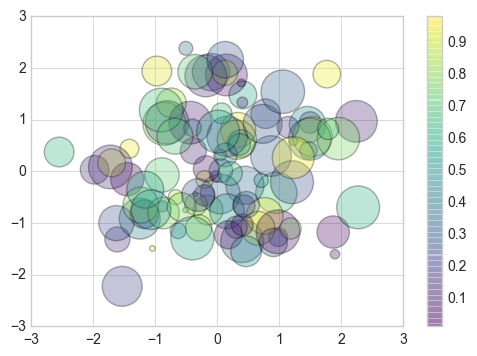

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

As datasets get larger than a few thousand points, `plt.plot` can be noticeably more efficient than `plt.scatter`. The reason is that `plt.scatter` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In `plt.plot`, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, `plt.plot` should be preferred over plt.scatter for large datasets.

__Errors and confidence__

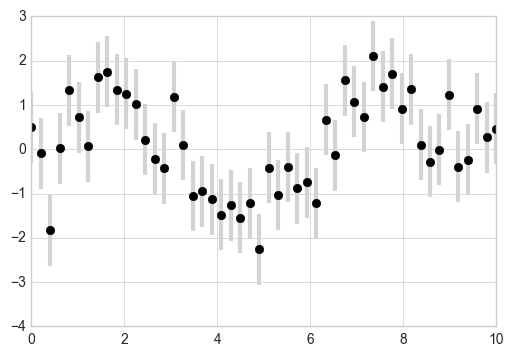

In [ ]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In [ ]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


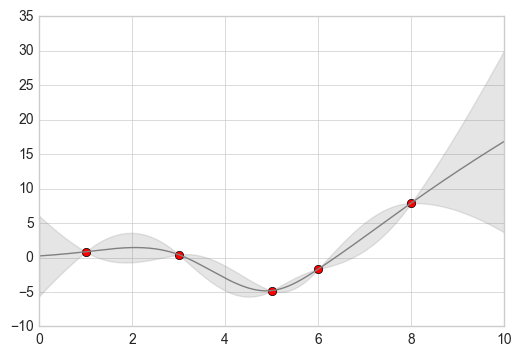

In [ ]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

__Contour Plots__

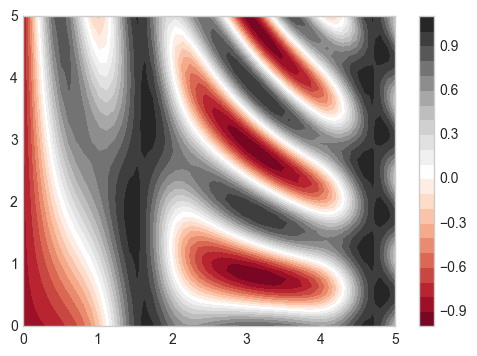

In [ ]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

__Histograms__

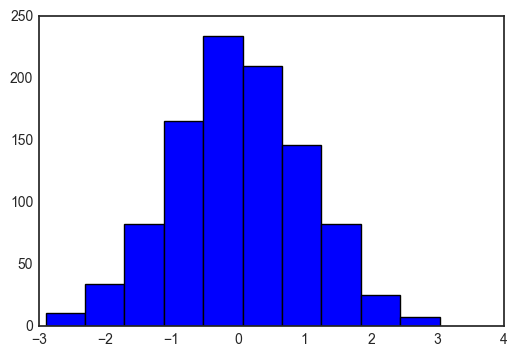

In [ ]:
plt.style.use('seaborn-white')
data = np.random.randn(1000)
plt.hist(data);

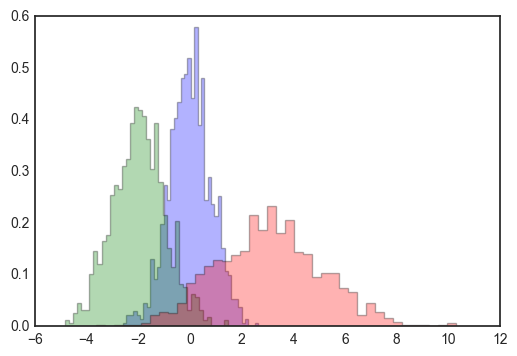

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [ ]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

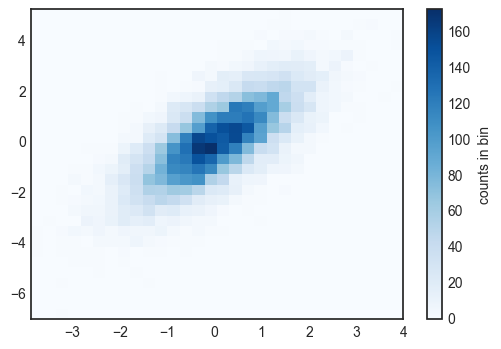

In [ ]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

__Subplots__

Create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

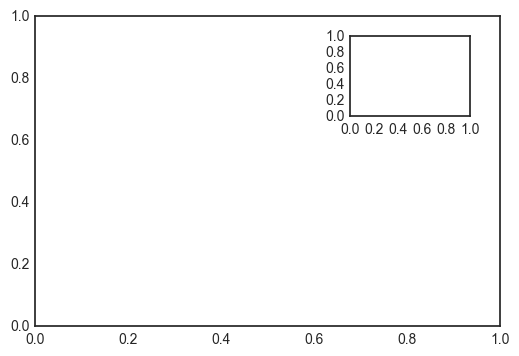

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

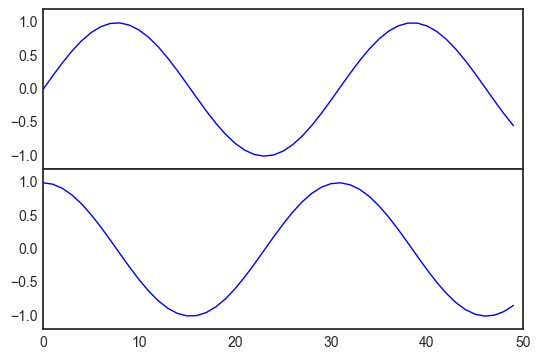

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

`subplot` command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right

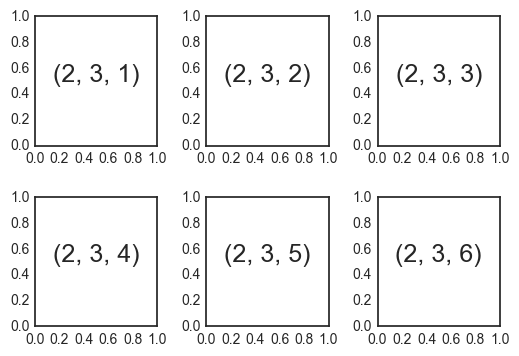

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

The arguments are the number of rows and number of columns, along with optional keywords `sharex` and `sharey`, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale

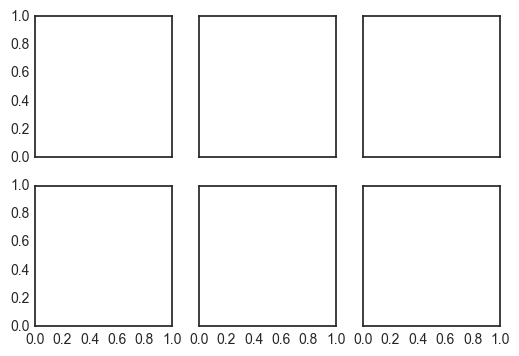

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

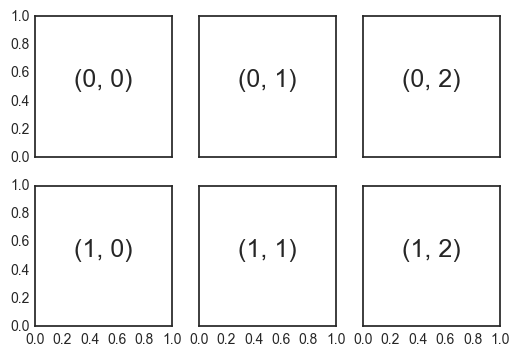

In [ ]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

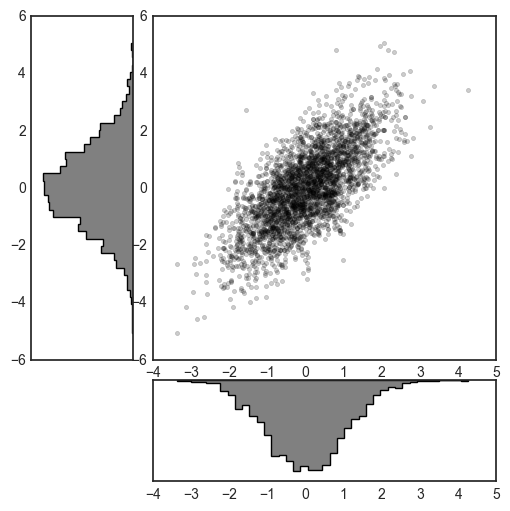

In [ ]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

__Annotations__

In [ ]:
births = pd.read_csv('/Users/s.stupnikov/Coding/work/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

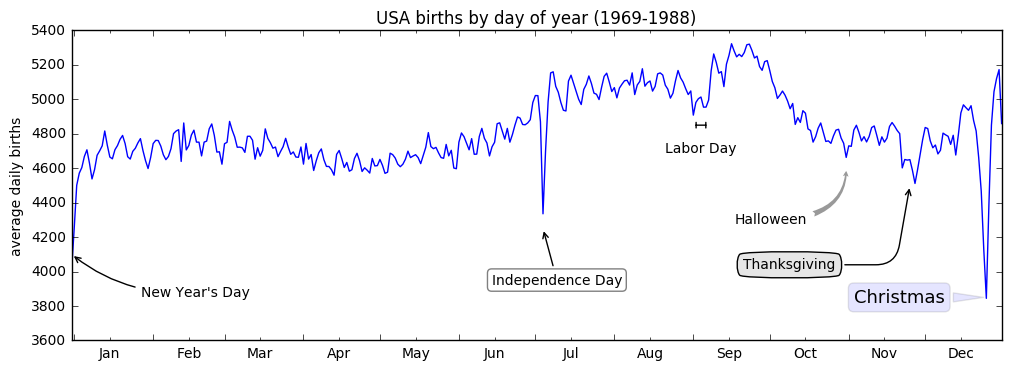

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

__Styles__

In [ ]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

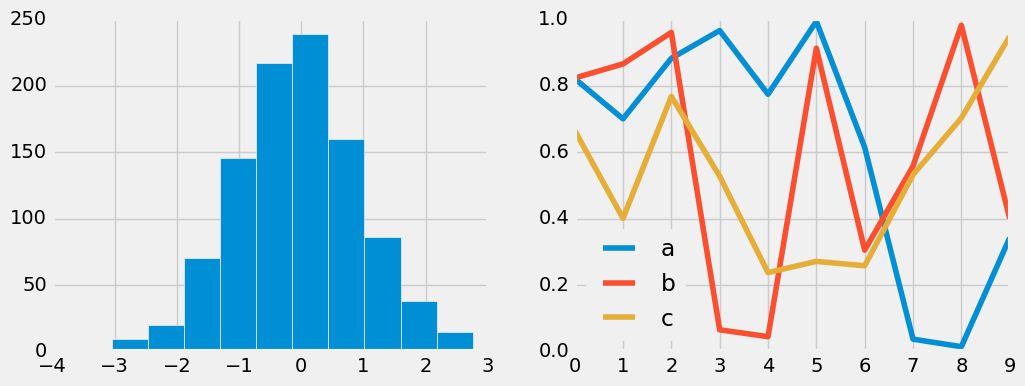

In [ ]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

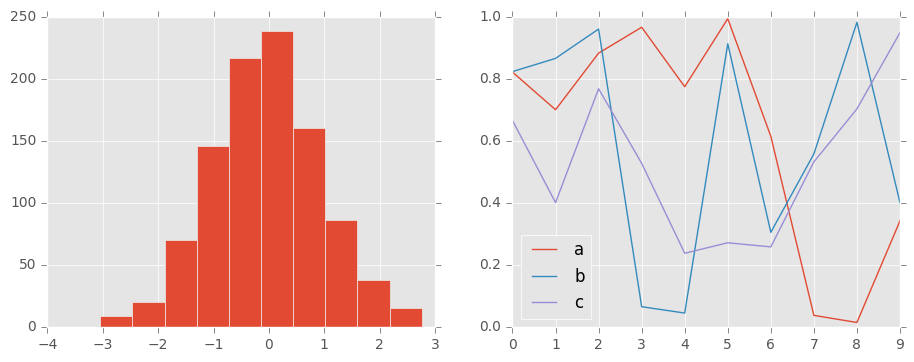

In [ ]:
with plt.style.context('ggplot'):
    hist_and_lines()

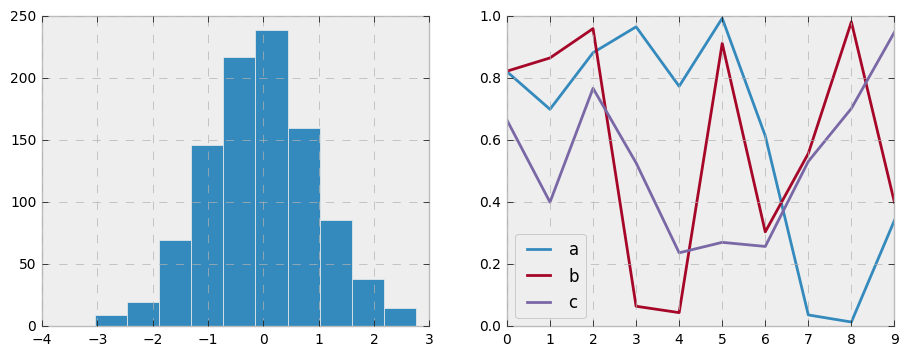

In [ ]:
with plt.style.context('bmh'):
    hist_and_lines()

#### seaborn

In [ ]:
import seaborn as sns
sns.set()

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

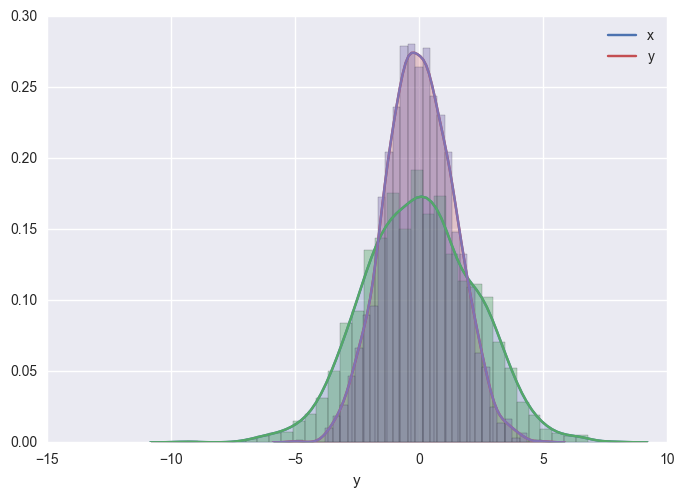

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)
    sns.distplot(data[col])

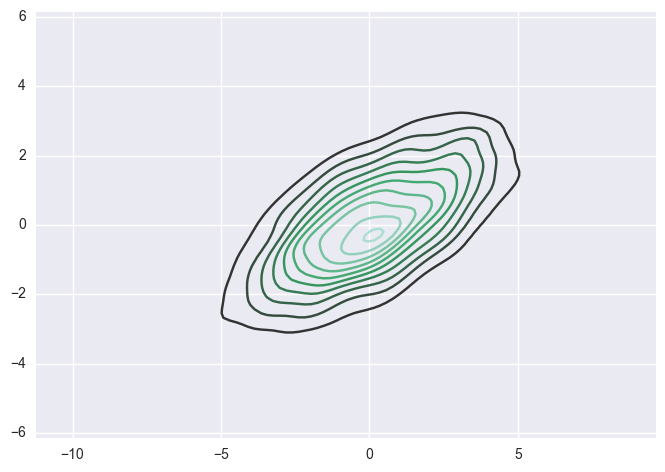

In [ ]:
sns.kdeplot(data);

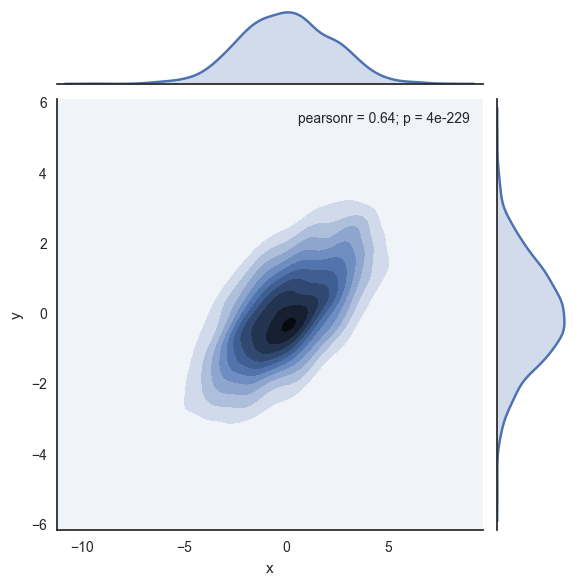

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde'); # or kind='hex'

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


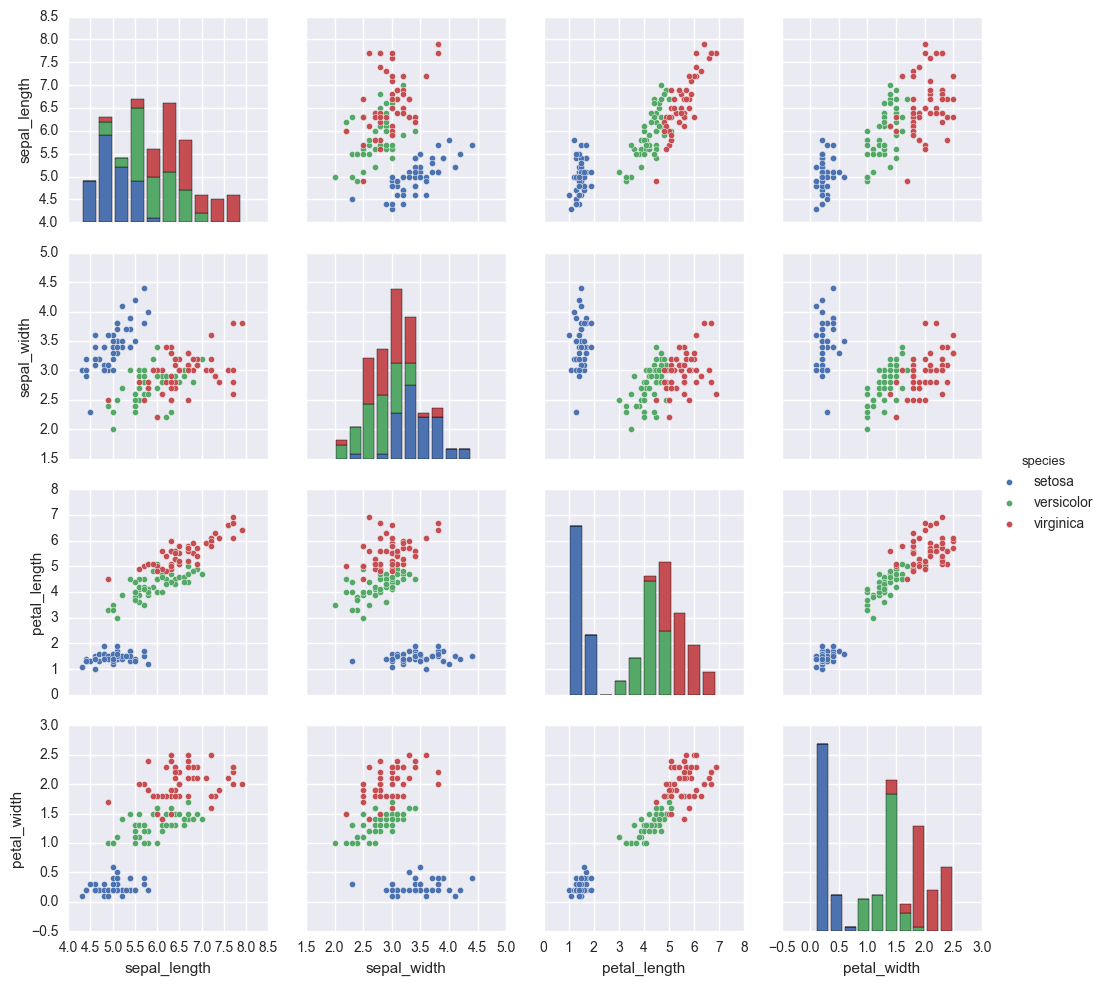

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


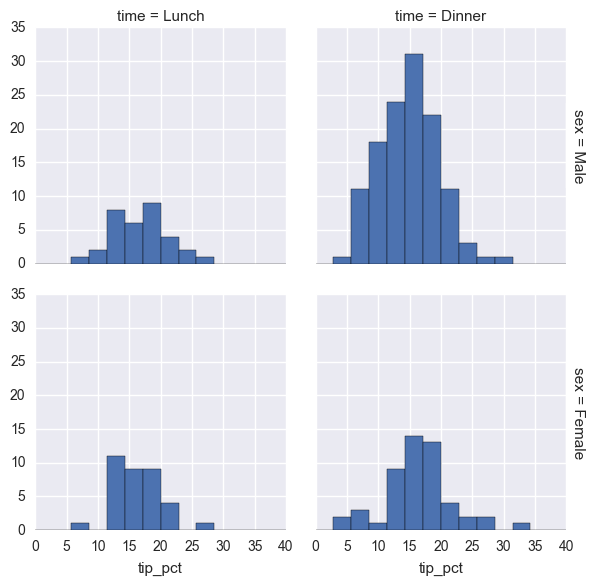

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


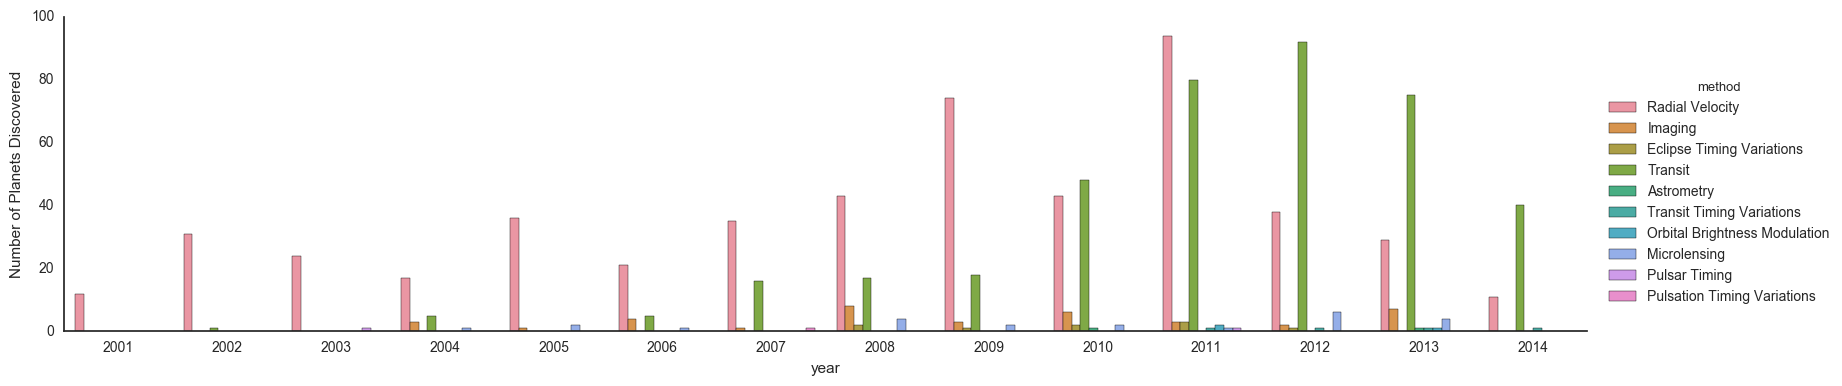

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

### References

* https://www.amazon.com/Data-Visualization-Python-JavaScript-Transform/dp/1491920513/
* http://adilmoujahid.com/posts/2016/08/interactive-data-visualization-geospatial-d3-dc-leaflet-python/
* https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
* https://gist.github.com/5agado/ee95008f25730d04bfd0eedd5c36f0ee#file-pandas-and-seaborn-ipynb
* http://kanoki.org/2017/07/09/get-started-with-matplotlib-data-visualization-for-python/
* https://www.dataquest.io/blog/python-data-visualization-libraries/

## Data visualization

![story](attachment:storytelling.png)

Graphical Perception: Theory, Experimentation, and Application to the development of Graphical Methods. William S. Cleveland; Robert McGill
![scale](attachment:cleveland_mcgill.jpg)

__Tufte’s Design Principles__

* Maximize data-ink ratio
    * Data-ink = the ink used to show data
    * Data-ink ratio = data-ink / total ink used

![ink1](attachment:_3d9ed259_13c26cde751__8000_00000086.png)

![ink2](attachment:_3d9ed259_13c26cde751__8000_00000087.png)

* Avoid chartjunk

![junk1](attachment:_3d9ed259_13c26cde751__8000_00000088.png)

![junk2](attachment:_3d9ed259_13c26cde751__8000_00000089.png)

* Use multi-functioning elements
* Layer information
* Maximize data density
    * data density = number of entries in data array / area of data graphic
    * shrink the graphics
    * maximize amount of data shown

![dens](attachment:_3d9ed259_13c26cde751__8000_00000090.png)

__Graphical Integrity__

* Clear, detailed labeling
* Appropriate scales
![jobs](attachment:_3d9ed259_13c26cde751__8000_00000083.png)

![scales](attachment:_3d9ed259_13c26cde751__8000_00000084.png)

* Lie factor: (Size of effect in graphic)/ (size of effect in data)
![lie](attachment:_3d9ed259_13c26cde751__8000_00000082.png)
* Show data variation, not design variation

__Colors__

![clr1](attachment:color%20info.png)

![clr2](attachment:colors.png)

![clr3](attachment:colors%20summary.png)

### References

* https://www.accenture.com/t20150523T021054__w__/us-en/_acnmedia/Accenture/Conversion-Assets/DotCom/Documents/Global/PDF/Digital_2/Accenture-Accellerating-Understanding-Through-Data-Visualization.pdf
* https://medium.com/towards-data-science/in-defense-of-simplicity-a-data-visualization-journey-86676bd05c57
* https://www.youtube.com/watch?v=fZswD5RC1G8&index=9&list=PLa4VFIBUKrgLao-DalwedOCiq9RV6MPk9
* http://info.slis.indiana.edu/~katy/S637-S11/cleveland84.pdf
* https://tallys.github.io/color-theory/
* https://brainwashing.pro/dataviz-online
* http://flowingdata.com/2016/12/29/best-data-visualization-projects-of-2016/
* https://medium.com/@enjalot/the-hitchhikers-guide-to-d3-js-a8552174733a
* https://www.youtube.com/watch?v=n5NcCoa9dDU&list=UUNYL0ZF2j8-OSGZ4iHBLNPA
* https://www.youtube.com/watch?v=NnxRyaAA55A
* http://www.cs.sfu.ca/~torsten/Teaching/Cmpt467/LectureNotes/02_design.pdf
* http://www.easynotecards.com/notecard_set/10262
* https://github.com/rougier/scientific-visualization-book

### Summary

* Understand the context – audience, data, takeaway/outcome
* Choose right display type – text, scatterplots, line charts, bar charts, ...
* Eliminate clutter – cut if no information value
* Draw attention where you want to – preattentive attributes of color, size, ...
* Linear is better for storytelling
* Guide users through the story – where to start, how to get back, reset
* Limit complexity initially, reveal as needed
* Cool and readability maybe at odds – recognize tradeoffs, tailor to audience
* Text good for storytelling
* State the point you want to make
* Start with an interesting view
* Put numbers and facts in context
* Connect relevant text and graphics
* Add summary/conclusions/”so what?”
* Labels and significant digits suggest what deserves attention
* Show how the interactivity works, make it intuitive
* Limit interactivity to key elements – too much can distract from story

## Big Data

#### Origins

Google File System
![gfs](attachment:gfs.png)

MapReduce
![mapred](attachment:EH8tY.jpg)

#### Hadoop

![hdp1](attachment:hadoop-architecture-diagram4.jpeg)

![hdp2](attachment:hadoop-architecture-diagram1-3.jpeg)

In [ ]:
import os
import sys
import ujson as json
import operator
import itertools
from optparse import OptionParser


import lib


class Network(object):
    def __init__(self, ip_min, ip_max, mask, total_hits=0, proxy_hits=0):
        self.ip_min = ip_min
        self.ip_max = ip_max
        self.mask = mask
        self.total_hits = total_hits
        self.proxy_hits = proxy_hits

    @classmethod
    def from_string(cls, string):
        s_parts = string.split("-")
        ip_min, ip_max, mask = map(int, s_parts)
        return cls(ip_min, ip_max, mask)

    @classmethod
    def from_json(cls, jstring):
        d = json.loads(jstring)
        return cls(**d)

    def as_json(self):
        return json.dumps(self.__dict__)

    def __contains__(self, item):
        return item.ip_min >= self.ip_min and item.ip_max <= self.ip_max


def find_net_for_ip(ip, nets):
    if not ip:
        return
    low = 0
    high = len(nets) - 1
    while low <= high:
        mid = (low + high) // 2
        if nets[mid].ip_min > ip and nets[mid].ip_max > ip:
            high = mid - 1
        elif nets[mid].ip_min < ip and nets[mid].ip_max < ip:
            low = mid + 1
        elif nets[mid].ip_min <= ip <= nets[mid].ip_max:
            return nets[mid]


def get_nets():
    nets = []
    with open("nets.txt") as fp:
        for line in fp.xreadlines():
            nets.append(Network.from_string(line.strip()))
    return sorted(nets, key=lambda n: (n.ip_min, n.ip_max))


def mapper(input, output):
    cond = lib.Q(filter=None) & lib.Q(user_ip__ne=None)
    nets = get_nets()
    for _, msg in lib.protoread(input).filter(cond):
        n = find_net_for_ip(msg["user_ip"], nets)
        if n:
            n.total_hits += 1

        if not msg.get("x_forwarded_for"):
            continue
        # remote_addr is not set if  ipv6
        ra, ff = msg.get("remote_addr"), msg["x_forwarded_for"]
        proxeies = ff[1:] + ([ra] if ra else [])
        for p in proxeies:
            n = find_net_for_ip(p, nets)
            if n:
                n.total_hits += 1
                n.proxy_hits += 1

    for n in nets:
        if n.proxy_hits:
            print >> output, "%s-%s\t%s" % (n.ip_min, n.ip_max, n.as_json())


def reducer(input, output):
    kv_stream = (line.strip().split("\t", 1) for line in input)
    nets = []
    for net_range, group in itertools.groupby(kv_stream, operator.itemgetter(0)):
        same_nets = [Network.from_json(n.strip()) for _, n in group]
        net = same_nets.pop()
        for n in same_nets:
            net.total_hits += n.total_hits
            net.proxy_hits += n.proxy_hits
        net.proxied_perc = net.proxy_hits * 100.0 / net.total_hits if net.total_hits else 0
        if net.proxy_hits > 10000 and net.proxied_perc > 50:
            nets.append(net)

    for n in sorted(nets, key=lambda n: (n.proxied_perc, n.proxy_hits), reverse=True):
        n.ip_min_str = librb.ip_int_to_str(n.ip_min)
        n.ip_max_str = librb.ip_int_to_str(n.ip_max)
        print >> output, n.as_json()


if __name__ == '__main__':
    if "map_input_file" in os.environ:
        print >> sys.stderr, os.environ["map_input_file"]

    parser = OptionParser()
    parser.add_option("--mapper", action="store_true", default=False)
    parser.add_option("--reducer", action="store_true", default=False)
    (options, args) = parser.parse_args()

    if options.mapper:
        mapper(sys.stdin, sys.stdout)

    if options.reducer:
        reducer(sys.stdin, sys.stdout)

#### YARN

![y1](attachment:hadoop-architecture-diagram8.jpeg)

#### ZooKeeper

![zoo1](attachment:hadoop-architecture-diagram7.jpeg)

![zoo2](attachment:hadoop-architecture-diagram6-1.jpeg)

#### Spark

![spark1](attachment:driver-sparkcontext-clustermanager-workers-executors.png)

![spark2](attachment:forrester_spark.PNG)

#### Kafka

![kafka](attachment:Partitioning.jpg)

### References

* https://static.googleusercontent.com/media/research.google.com/ru//archive/mapreduce-osdi04.pdf
* https://static.googleusercontent.com/media/research.google.com/ru//archive/gfs-sosp2003.pdf
* http://shop.oreilly.com/product/0636920033448.do
* https://www.datadoghq.com/blog/hadoop-architecture-overview/
* http://shop.oreilly.com/product/0636920034957.do
* https://kafka.apache.org/
* https://www.confluent.io/blog/turning-the-database-inside-out-with-apache-samza/

### Summary

* hadoop = hdfs + mapreduce